<a href="https://colab.research.google.com/github/claredavies/DataScienceCoursework/blob/master/StudentGradePredictionCoursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports & Loading CSV

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
import io
from google.colab import files

data_to_load_students = files.upload()
std = pd.read_csv(io.BytesIO(data_to_load_students['DataCoursework2.csv']))
std.head(5)

Saving DataCoursework2.csv to DataCoursework2 (1).csv


,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5,16.09,5.00,21.88,5.0,5.00,5.0,82.97,0,0,0,0,7,30,1,0,30,4,0,0,14,39,2,0,24,6,1,0,28,30,2,0,2,0,1,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5,17.83,5.00,22.27,5.0,4.00,5.0,82.43,8,0,0,0,61,10,3,8,100,4,4,3,130,16,1,4,48,19,5,5,57,22,2,4,31,9,0,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5,15.22,5.00,27.05,2.5,5.00,5.0,79.44,4,0,0,0,19,10,3,3,25,4,0,2,50,19,2,2,28,6,0,2,14,20,2,0,12,4,0,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5,10.00,5.00,31.02,5.0,3.13,5.0,80.65,12,0,0,1,30,10,1,6,79,4,2,2,240,27,2,1,47,4,3,1,99,19,4,0,29,4,5,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5,12.17,4.93,15.91,5.0,4.67,5.0,67.68,6,0,0,0,0,0,0,0,27,5,0,0,6,15,1,0,32,12,0,8,22,18,1,2,43,4,3,6,8,5,1,1,5,3,1,0,2


Summing Stats

In [10]:
std['OverallStat0'] = std['Week1_Stat0'] + std['Week2_Stat0'] + std['Week3_Stat0'] + std['Week4_Stat0'] + std['Week5_Stat0'] + std['Week6_Stat0'] + std['Week7_Stat0']  + std['Week8_Stat0'] + std['Week9_Stat0']
std['OverallStat1'] = std['Week1_Stat1'] + std['Week2_Stat1'] + std['Week3_Stat1'] + std['Week4_Stat1'] + std['Week5_Stat1'] + std['Week6_Stat1'] + std['Week7_Stat1']  + std['Week8_Stat1'] + std['Week9_Stat1']
std['OverallStat2'] = std['Week1_Stat2'] + std['Week2_Stat2'] + std['Week3_Stat2'] + std['Week4_Stat2'] + std['Week5_Stat2'] + std['Week6_Stat2'] + std['Week7_Stat2']  + std['Week8_Stat2'] + std['Week9_Stat2']
std['OverallStat3'] = std['Week1_Stat3'] + std['Week2_Stat3'] + std['Week3_Stat3'] + std['Week4_Stat3'] + std['Week5_Stat3'] + std['Week6_Stat3'] + std['Week7_Stat3']  + std['Week8_Stat3'] + std['Week9_Stat3']

std.head(2)

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade,OverallStat0,OverallStat1,OverallStat2,OverallStat3
0,ML-2020-1,5.00,15.0,5,16.09,5.0,21.88,5.0,5.0,5.0,82.97,0,0,0,0,7,30,1,0,30,4,0,0,14,39,2,0,24,6,1,0,28,30,2,0,2,0,1,0,5,4,0,4,8,6,1,0,4,118,119,8,4
1,ML-2020-2,3.33,15.0,5,17.83,5.0,22.27,5.0,4.0,5.0,82.43,8,0,0,0,61,10,3,8,100,4,4,3,130,16,1,4,48,19,5,5,57,22,2,4,31,9,0,8,5,2,0,0,25,3,2,5,4,465,85,17,37


Data Exploration

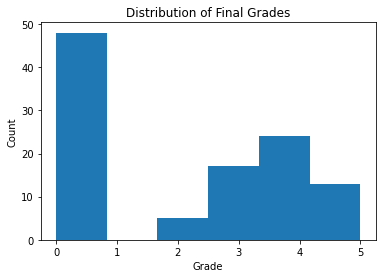

<Figure size 432x288 with 0 Axes>

In [11]:
# Histogram of grades
plt.hist(std['Grade'], bins = 6)
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Final Grades')
plt.show()
plt.clf()

Find High Correlation Features

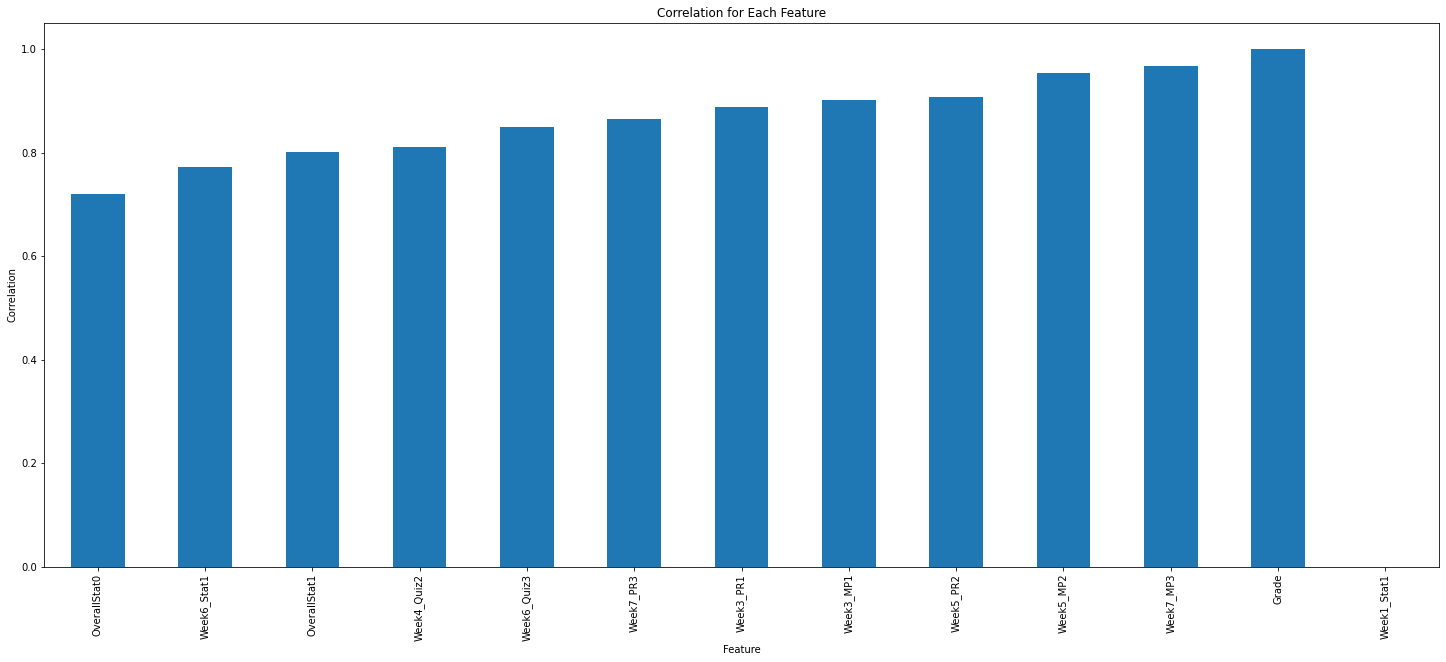

In [12]:
std_features_keep = std.drop(['Week8_Total'],axis=1)

# Create correlation matrix
corr_matrix = std_features_keep.corr()['Grade'].sort_values()
threshold = 0.7

for  i, v in corr_matrix.iteritems():
    if(v < threshold):
      std_features_keep = std_features_keep.drop(i, axis=1)
  
# Plot for correlation
std_plot = (std_features_keep.corr()['Grade'].sort_values()).plot(kind="bar",figsize=(25,10))
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.title('Correlation for Each Feature')
plt.show()

std_features_keep = std_features_keep.drop('Grade', axis=1)

Random Forest

In [23]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# 'Week7_MP3','Week5_MP2','Week5_PR2','Week3_MP1','Week3_PR1','Week7_PR3'
X = std[['Week7_MP3','Week5_MP2','Week5_PR2']] 
y=std['Grade']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
random_forest_accuracy = metrics.accuracy_score(y_test, y_pred)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",random_forest_accuracy)

Accuracy: 0.8787878787878788


K-Nearest Neighbour


k:::   4  max score:::  0.8636363636363636


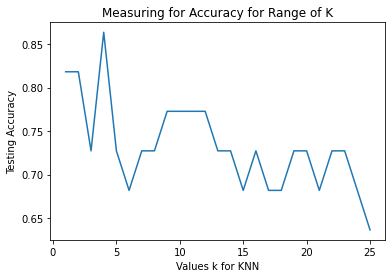

In [19]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

X = std[['Week7_MP3','Week5_MP2','Week5_PR2']] 
y=std['Grade']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 70% training and 30% test

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

k_range = range(1,26)
scores = {}
scores_list = []
max_score = 0.00
max_k = 1

for k in k_range:
      knn = KNeighborsClassifier(n_neighbors=k) 
      knn.fit(X_train, y_train)
      y_pred = knn.predict(X_test)
      scores[k] = metrics.accuracy_score(y_test, y_pred)
      scores_list.append(scores[k])
      if scores[k] > max_score:
        max_k = k
        max_score = scores[k]

plt.clf()
plt.plot(k_range,scores_list)
plt.xlabel("Values k for KNN")
plt.ylabel("Testing Accuracy")
plt.title('Measuring for Accuracy for Range of K')

knn_accuracy_score =  max_score

print()# Printing new line
print("k:::   " + str(max_k) + "  max score:::  " + str(knn_accuracy_score))

Comparing the 2 Classifiers

<Figure size 432x288 with 0 Axes>

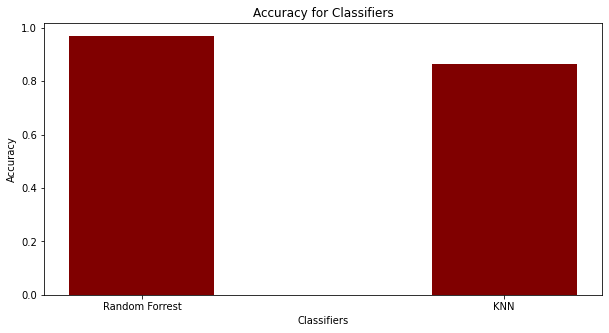

In [ ]:
data = {'Random Forrest':random_forest_accuracy, 'KNN':knn_accuracy_score}
classifier = list(data.keys())
accuracy = list(data.values())
  
plt.clf()
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(classifier, accuracy, color ='maroon',width = 0.4)
 
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Accuracy for Classifiers")
plt.show()
 